<a href="https://colab.research.google.com/github/jakubtwalczak/Muller_Guido_Introduction_to_ML/blob/main/Rozdzia%C5%82_2_uczenie_nadzorowane_cz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uwaga - do dalszej pracy potrzebować będziemy biblioteki mglearn, która nie znajduje się standardowo w zasobach Google Colab, jednak możemy ją zainstalować w notatniku.

In [1]:
!pip install mglearn

# Ładowanie danych.

Ładujemy syntetyczny zestaw danych **forge**. Zawiera on dwie cechy i zmienną zależną - etykietę.

In [2]:
import mglearn
X, y = mglearn.datasets.make_forge()

In [3]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [4]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

Zestaw składa się z 26 punktów danych i 2 cech.

In [5]:
X.shape

(26, 2)

Na wykresie punktowym zobrazujemy podział punktów danych na klasy, przedstawiając klasę 0 jako kropki, a 1 - trójkąty.

Text(0, 0.5, 'Second feature')

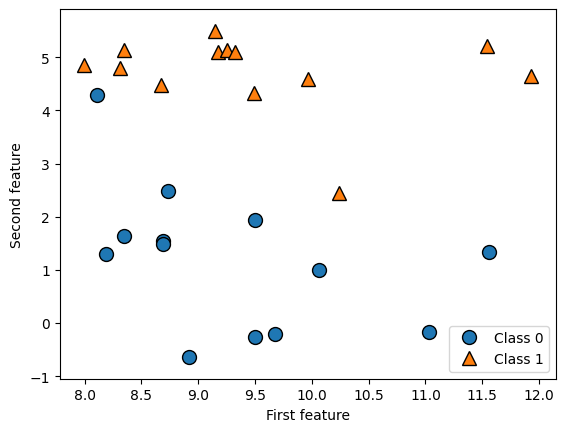

In [6]:
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

Innym syntetycznym zestawem danych jest **wave**, który ma jedną zmienną niezależną i ciągłą zmienną docelową. Dobrze nadaje się on do zwizualizowania regresji, w formie wykresu punktowego.

Text(0, 0.5, 'Target')

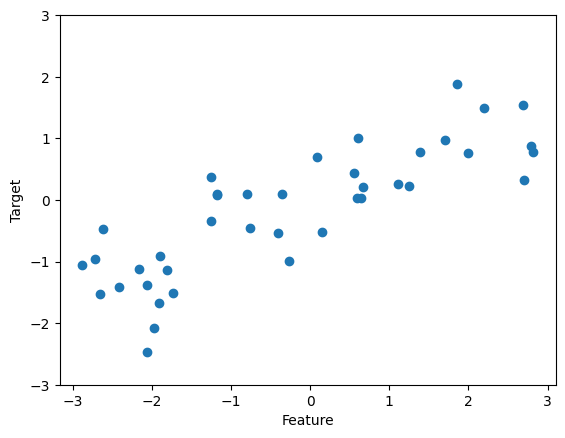

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Takie proste, niskowymiarowe datasety idealnie nadają się do zilustrowania zależności cech, a także sprawdzania na nich działania algorytmów. Na ogół jednak mierzymy się z raportami mającymi więcej niż dwa wymiary, których nie da się tak łatwo przedstawić w formie wykresu.

W bibliotece scikit-learn posiadamy wiele innych, rzeczywistych zestawów. W tym notatniku wykorzystamy dwa zestawy - **cancer** (dane dot. przypadków raka piersi z Wisconsin) oraz **boston** ("Boston Housing" - zawierający wartości domów w kilku dzielnicach Bostonu w latach 70. XX w.). Pierwszy z nich służy klasyfikacji binarnej (guz złośliwy lub łagodny), zaś drugi regresji liniowej (w tym wypadku, przewidywaniu wartości ciągłej, jaką jest wartość domu, przy uwzględnieniu licznych zmiennych).

Dataset cancer ładujemy funkcją load_breast_cancer z modułu sklearn.datasets.

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
print(f"cancer.keys: {cancer.keys()}")

cancer.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Na zestaw składa się 569 punktów danych, po 30 cech każdy.

In [10]:
print(f"Shape of cancer data: {cancer.data.shape}")

Shape of cancer data: (569, 30)


Wyświetlamy liczebność przypadków - złośliwych (ang. malignant) jest 212, łagodnych (ang. benign) 357.

In [11]:
import numpy as np

print(f"Sample counts per class:\n{dict(zip(cancer.target_names, (np.bincount(cancer.target))))}")

Sample counts per class:
{'malignant': 212, 'benign': 357}


Sprawdzamy też opis znaczenia każdej cechy, używając atrybutu feature_names.

In [12]:
print(f"Feature names:\n{cancer.feature_names}")

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Dla uzyskania szerszych informacji nt. danych, używamy

In [13]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Zbiór boston dostępny jest obecnie na platformie Github - z powodów etycznych został on usunięty z biblioteki scikit-learn. Niezależnie od powodów, z których to nastąpiło, nadal jest on niezwykle wartościowy dla potrzeb treningowych.

In [14]:
import pandas as pd

boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Zestawów tych użyjemy w celu wyjaśnienia i zobrazowania właściwości różnych algorytmów uczenia maszynowego.

# K-najbliższych sąsiadów (k-nearest neighbors).

Prawdopodobnie najprostszy w działaniu i w zrozumieniu algorytm machine learning. Modele na nim oparte wyszukują w zestawie danych uczących punktów najbliższych do tego, który jest przedmiotem predykcji.

## Klasyfikacja k-NN.

W najprostszej postaci algorytm k-NN bierze pod uwagę tylko jednego najbliższego sąsiada, który jest najbliższy dla punktu prognozowanego, jako że wynik dla niego jest znany.

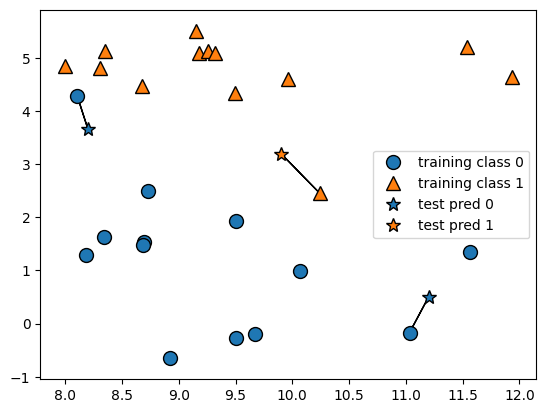

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Powyższy przykład (korzystający ze zbioru forge) ilustruje dopasowanie modelu k-NN przy wskazaniu jednego sąsiada jako parametru. Na wykresie dodaliśmy trzy nowe punkty (w formie gwiazdek, której kolor odpowiada wynikowi przewidywania). Dla każdego z nich dopasowany został jeden najbliższy punkt sąsiadujący, którego etykieta jest wynikiem predykcji.

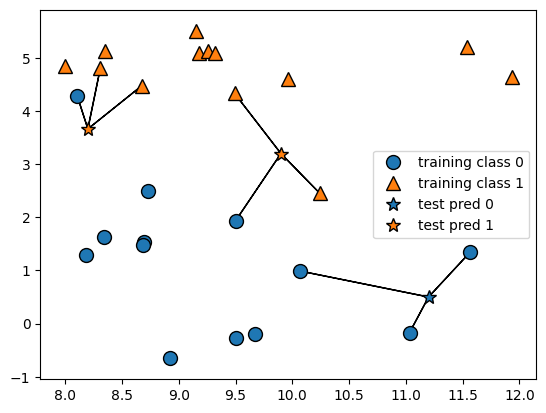

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Jednak, zamiast wybierać tylko jednego sąsiada, można brać pod uwagę dowolną liczbę sąsiadów - czyli k (parametr n_neighbors). Gdy uwzględniamy więcej niż jednego sąsiada, algorytm stosuje mechanizm głosowania i dla każdego z punktów liczy, do której z klas przynależy większa liczba sąsiadów. Klasa przeważająca jest tą przypisaną w prognozie.

Algorytm ten można z równym powodzeniem stosować do klasyfikacji binarnej, jak i wieloklasowej. W przypadku większej liczby klas ponownie liczymy, ilu sąsiadów należy do danej klasy, i wybieramy najczęściej w tym podzbiorze reprezentowaną klasę.

A jak wygląda implementacja tego modelu w scikit-learn? Zacznijmy od podział na zbiór treningowy i testowy.

In [17]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Importujemy klasę i tworzymy jej instancję, możemy określić parametry dla tejże instancji.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

Następnie dopasowujemy model do zestawu treningowego. W przypadku tej konkretnej klasy oznacza to przechowywanie zestawu danych, aby je wykorzystać do prognozowania.

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Aby tworzyć prognozy, należy skorzystać z metody predict. Dla każdego punktu w zbiorze testowym wskazuje się jego najbliższych sąsiadów i typuje spośród nich najbardziej powszechną klasę.

In [20]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


Dla oceny tego, jak model radzi sobie z uogólnianiem, wybieramy metodę score z danymi testowymi i ich faktycznymi etykietami. Dokładność (accuracy) modelu wynosi ok. 0,86.

In [21]:
print(f"Test set accuracy: {clf.score(X_test, y_test)}")

Test set accuracy: 0.8571428571428571


Dla zestawów danych o dwóch wymiarach możemy również zilustrować prognozowanie dla wszystkich możliwych punktów testowych na płaszczyźnie XY - kolorujemy ją zgodnie z klasą, która byłaby przypisana do punktu w tym regionie, dzięki czemu mamy zarysowaną granicę decyzyjną, oddzielającą przestrzenie, w których algorytm przypisuje klasy próbkom danych.

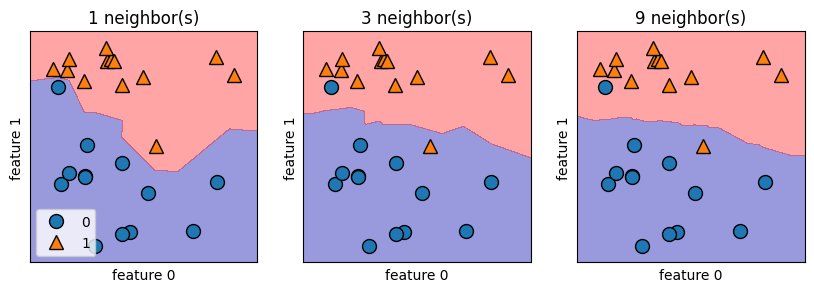

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Widoczne jest, że użycie jednego sąsiada skutkuje tym, że wytyczona granica decyzyjna jest ściśle zgodna z danymi uczącymi. Im większą liczbę sąsiadów uwzględniamy, tym gładsza jest ta granica. Tym samym model wydaje się być mniej złożony, a co za tym idzie, bardziej uogólniający. Zasadą jest więc to, że model jest tym bardziej złożony, im mniej sąsiadów użyto do przewidywania. Skrajny przypadek to wskazanie tylu sąsiadów, ile jest próbek danych w zbiorze treningowym - wówczas wszystkie próbki będą miały tych samych sąsiadów, przez co prognozy byłyby takie same: klasa najczęściej występująca w zbiorze uczącym.

Na rzeczywistym zestawie cancer zbadamy, czy ww. wniosek o złożoności modelu można potwierdzić. Najpierw jednak ocenimy jakość jego uczenia i przetestujemy wydajność z różną liczbą sąsiadów.

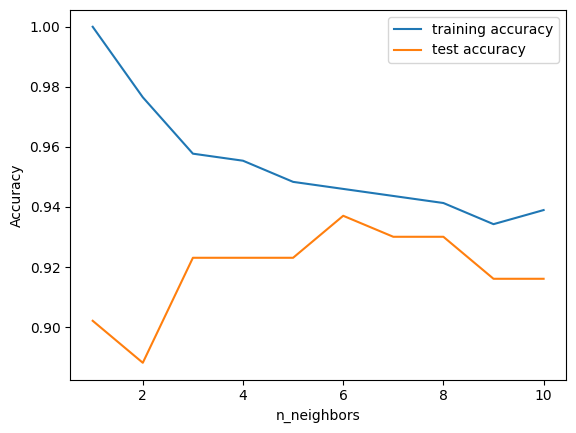

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Prognoza jest doskonała, gdyby wziąć pod uwagę prognozę algorytmu z jednym sąsiadem na zbiorze uczącym. Gdy jednak weźmiemy pod uwagę większą liczbę sąsiadów, model staje się mniej złożony. Dokładność uczenia spada, ale lepiej wygląda zdolność do uogólniania. Optymalny punkt przewidywania znajduje się mniej więcej na poziomie sześciu sąsiadów. Najgorsza wydajność występuje przy dokładności ok. 0,88.

## Regresja k-sąsiadów.

Aby zobaczyć działanie wariantu regresji algorytmu k-najbliższych sąsiadów, używamy zestawu wave. Na osi X dodajemy trzy punkty danych testowych w postaci zielonych gwiazd. Wynik prognozy to - przy zastosowaniu jednego sąsiada - wynik najbardziej zbliżonego punktu.

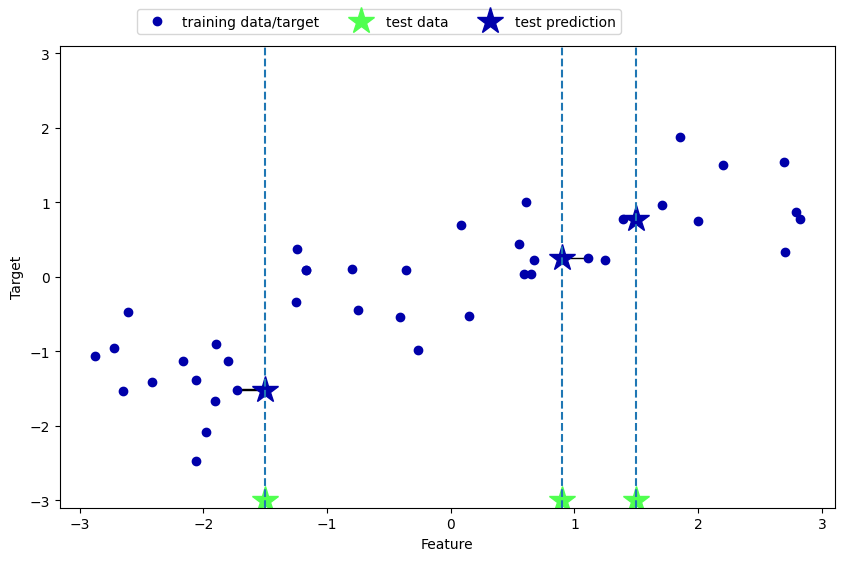

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Kiedy stosujemy wielu najbliższych sąsiadów, wynik prognozy to średnia wartości tychże.

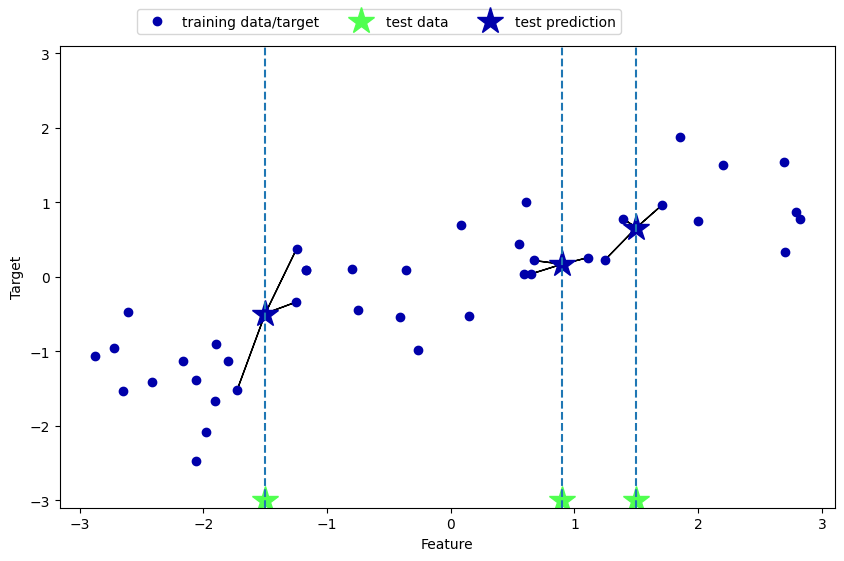

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

W scikit-learn algorytm regresji k-najbliższych sąsiadów jest zaimplementowany w klasie KNeighborsRegressor.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print(f"Test set predictions:\n{reg.predict(X_test)}")

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Model możemy również ocenić metodą punktacji, która zwraca dla regresorów współczynnik R^2. Rezultat wynosi ok. 0,834, co wskazuje na stosunkowo dobre dopasowanie modelu regresji.

In [27]:
print(f"Test set R^2: {reg.score(X_test, y_test)}")

Test set R^2: 0.8344172446249605


W przypadku jednowymiarowego zestawu danych można zobaczyć, jak przedstawiają się prognozy dla wszystkich możliwych wartości cech. Gdy używamy tylko jednego sąsiada, model dopasowuje się do danych treningowych, ale przez to bardzo słabo uogólnia. Uwzględnienie większej liczby sąsiadów prowadzi do prognoz mniej dopasowanych do danych uczących, ale za to model ma wyraźnie wyższą zdolność do generalizacji.

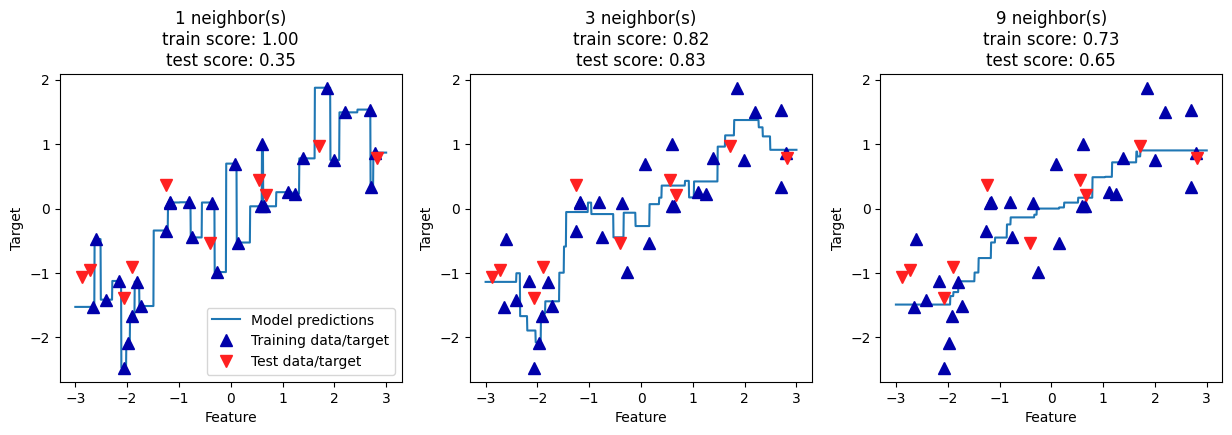

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        f"{n_neighbors} neighbor(s)\n"
        f"train score: {reg.score(X_train, y_train):.2f}\n"
        f"test score: {reg.score(X_test, y_test):.2f}"
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

## Podsumowanie.

Modele k-najbliższych sąsiadów mają co do zasady raptem dwa istotne parametry - liczbę sąsiadów i miarę odległości między punktami (domyślnie - euklidesowa).

Plusy:
- model prosty do zrozumienia,
- rozsądna wydajność bez konieczności zbytniego dostrajania,
- dobry jako metoda wstępnego wypróbowania przed zastosowaniem bardziej zaawansowanych algorytmów,
- na ogół szybki w działaniu.

Minusy:
- może predykować powoli przy większym zbiorze treningowym,
- nie radzi sobie z danymi o dużej liczbie cech lub z rzadkimi zestawami (takimi, w których większość cech ma przez większy czas wartość 0).